# Medicina Inteligente: atravesando fronteras con Inteligencia Artificial

3 PREGUNTAS PARA LOS ALUMNOS


* ¿Qué es la optimización en el contexto del entrenamiento de modelos de machine learning?
* Define el concepto de overfitting en el contexto del machine learning. ¿Por qué es problemático y cómo se puede mitigar este fenómeno al entrenar modelos?

* ¿Cuáles son las principales diferencias entre el aprendizaje supervisado y el aprendizaje no supervisado en machine learning?




## Importación de librerías

In [2]:
# Pytorch para redes neuronales
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torch.utils.data import DataLoader
from torchvision.models import resnet18
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
import torchvision.transforms.functional as F

# Librerías para manejo de datos y álgebra lineal
import numpy as np
import pandas as pd

# matplotlib y seaborn para graficar resultados
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para modelado de datos, métricas, y funciones útiles
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree



## ¿Qué es el Machine Learning y el Deep Learning?

El **aprendizaje automático** (*machine learning*) es un área de las ciencias computacionales que busca simular el proceso de aprendizaje humano mediante la exploración de datos y una optimización continua para mejorar el rendimiento de tareas específicas.

El **aprendizaje profundo** (*deep learning*) es una sub-área del aprendizaje automático que utiliza simula la propagación de información en el cerebro por medio de *redes neuronales*. Estas se organizan en capas, que se posicionan una después de otra, de forma que aumentan en *profundidad*.

## Algunos ejemplos de ML y DL en la vida diaria

* Alexa
* Google Maps
* Netflix
* Google Traductor
* Teclado del celular
* CAPTCHA

## Pasos para la implementación de algoritmos de ML y DL

1. Entender el problema
2. Adquisición y/o búsqueda de datos
3. Pre-procesamiento de datos
4. Extracción de características
5. Elección de modelo o arquitectura
6. Entrenamiento del modelo
7. Evaluación del modelo
8. Despliegue del modelo (en aplicaciones prácticas e industriales)

<figure>
<img    src="images/ml_workflow.png"
        width=1200
        height=200>
<figcaption>Fig. 1: Flujo de trabajo convencional en el uso de herramientas de ML en aplicaciones biomédicas (Angermueller, et al., 2016).
</figure>

## Carga y pre-procesamiento de datos

In [3]:
breast_cancer_df = pd.read_csv("lung_cancer/data.csv")
breast_cancer_df.drop(columns="id", inplace=True)
breast_cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Exploración de los datos

In [4]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Visualización de los datos

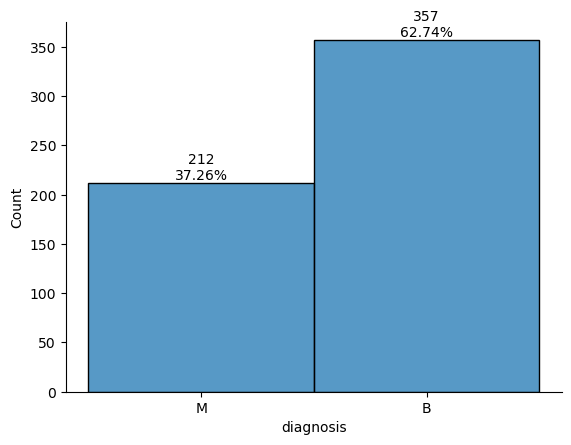

In [5]:
sns.histplot(data=breast_cancer_df, x='diagnosis')
for i, bar in enumerate(plt.gca().patches):
    counts = bar.get_height()
    percent = f'{round(counts / breast_cancer_df.shape[0] * 100, 2)}%'
    text = f'{counts}\n{percent}'
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(), text, ha='center', va='bottom')
sns.despine()
plt.show()

### Estandarización y codificación

In [6]:
scaler = StandardScaler().set_output(transform='pandas')
df_num = breast_cancer_df.drop(columns = 'diagnosis').copy()
df_num = scaler.fit_transform(df_num)

### Graficar distribución de datos y variables

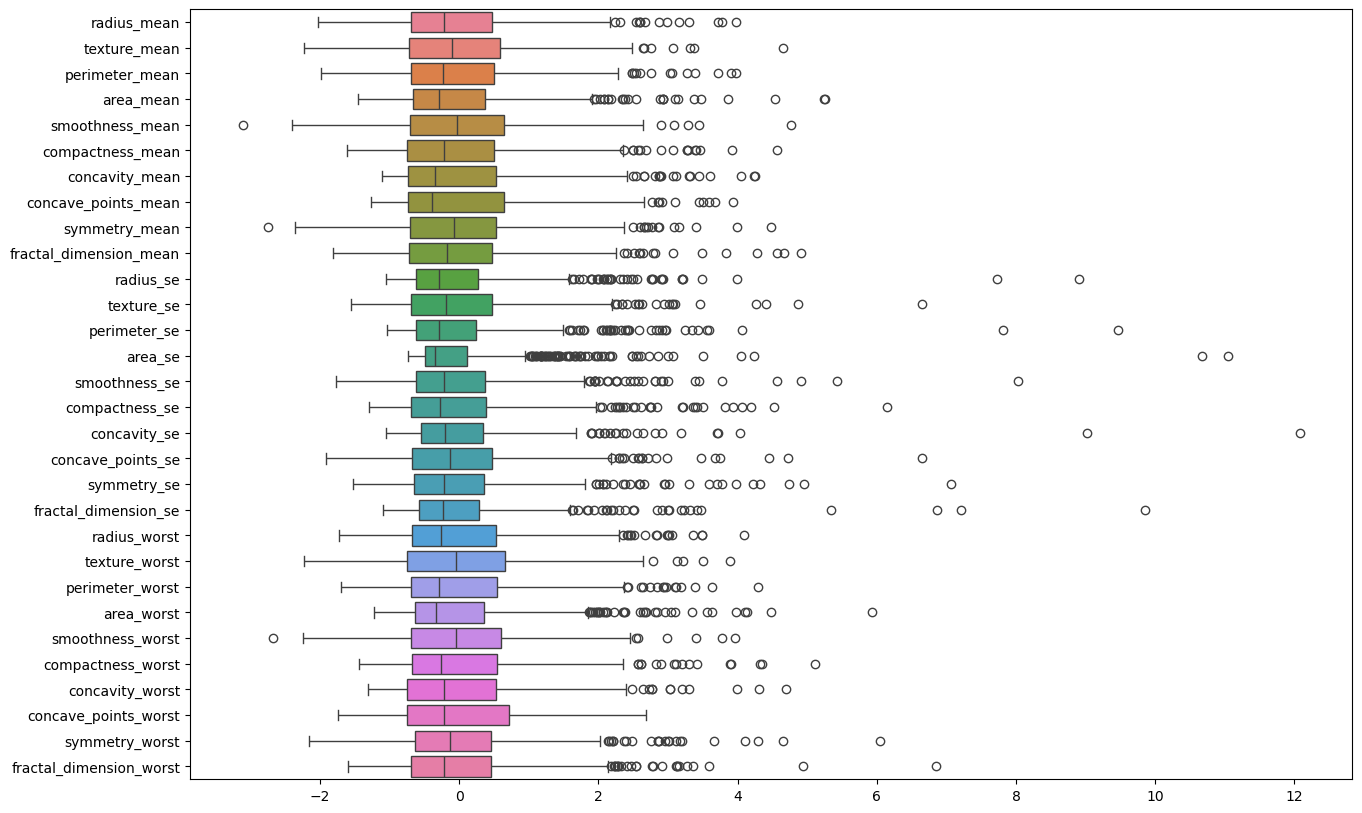

In [7]:
# Plot distrubtion of numerical variables again
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_num, orient = 'h')
plt.show()

### Asignación de etiquetas y división de conjuntos de datos

In [8]:
X = df_num.copy()
y = breast_cancer_df[['diagnosis']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)

## Métodos de Machine Learning

### K-nearest neighbors

---
Pensemos en un conjunto de datos como puntos en un plano cartesiano. Al entrar un nuevo dato este se mapea y cae en una región con otros puntos representando otras instancias del problema, se determina una distancia o **vecindad** para *clasificar* al nuevo punto.  

* *K* = Al numero de vecinos que usa de referencia

* Distancia = Una fórmula para calcular la a distancia entre el dato de entrada y los demás

* Selección = Elije los puntos más cercanos para después ya sea, calcular el **promedio** (problema de regresión), o solo la **distancia** (clasificación)

No realiza predicciónes especificas sobre el funcionamiento de los datos, por eso normalmente se usa para clasificaciones, y reconocimiento de patrones y caracteristicas.
La elección de *K* es muy importante ya que un numero alto nos lleva a un **sobreajuste** (*overfitting*) y uno muy pequeño a un **subajuste** (*underfitting*).

<figure>
<img    src="images/A-generalized-KNN-architecture-.ppm"
        width=350
        height=300>
</figure>

### Regresión lineal y logística
---
La **regresión lineal**, es un algoritmo es utilizado para predecir valores continuos encontrando la mejor linea de ajuste para los datos de salida ($y = mx + b$).

*   **Parámetros**: $m$ y $b$ (valores inicialmente aleatorios).
*   **Cálculo de la función de costo**: Para evaluar que tan bien se ajusta la linea a los datos (*error cuadrático medio*).



La **regresión logística** se usa para clasificaciones binarias (o sea dos conjuntos de datos) buscando la propabilidad de pertenencia a una clase.

*   Se utiliza la función sigmoide para el calculo de probabilidad.
*   Parámetros: $m$ y $b$
*   **Función de costo**: Evalua la eficacia de la predicción (*entropia cruzada*).
*   Optimización de parámetros: Minimiza la función de costo (*gradiente descendente*)

<img src="https://developer.ibm.com/developer/default/tutorials/build-a-logistic-regression-neural-network-using-tensorflow/images/figure1.png" alt="Imagen de ejemplo" width=300, height=215>

#### Ejemplo de regresión logística

In [9]:
# Construcción de un modelo de regresión logística y ajustarlo a los datos
logreg = LogisticRegression(random_state=42).fit(X_train, y_train)

/home/msr/miniconda3/envs/deep_learning/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
# Usar el modelo de regresión logística para obtener predicciones en el conjunto de prueba
logreg_y_pred = logreg.predict(X_test)

##### Evaluación del modelo de regresión logística

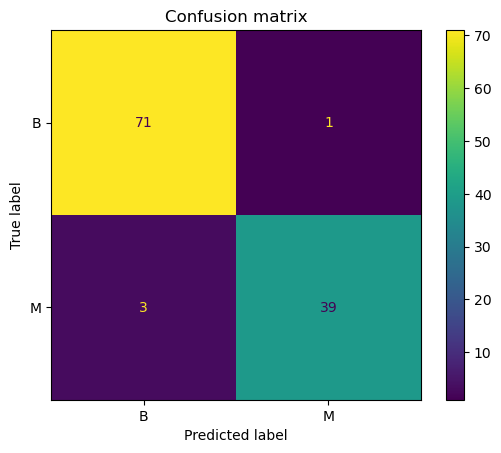

In [11]:
# Calcular la matriz de confusión para evaluar el rendimiento del modelo
log_cm = confusion_matrix(y_test, logreg_y_pred, labels=logreg.classes_)

# Crear arreglo de la matriz de confusión
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=logreg.classes_)

# Gráficar la matriz de confusión
log_disp.plot(values_format='')
plt.title("Confusion matrix")
plt.show()

In [12]:
# Crear un reporte de la clasificación del modelo de regresión logística
target_names = ['Predicted Benign', 'Predicted Maglinant']
print(classification_report(y_test, logreg_y_pred, target_names=target_names))

                     precision    recall  f1-score   support

   Predicted Benign       0.96      0.99      0.97        72
Predicted Maglinant       0.97      0.93      0.95        42

           accuracy                           0.96       114
          macro avg       0.97      0.96      0.96       114
       weighted avg       0.97      0.96      0.96       114



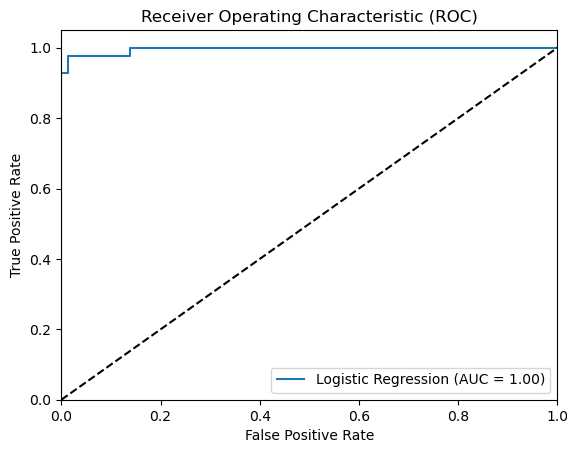

In [13]:
# Graficar curva ROC del rendimiento del modelo de regresión logística

log_probs = logreg.predict_proba(X_test)[:, 1]
log_fpr, log_tpr, _ = roc_curve(y_test, log_probs, pos_label="M")
log_auc = roc_auc_score(y_test, log_probs)

plt.plot(log_fpr, log_tpr, label='Logistic Regression (AUC = %0.2f)' % log_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### Principal Components Regression
---
Es un método de regresion lineal que utiliza un modelo de aprendizaje no supervisado conocido como **analisis de componentes principales**, que nos permite reducir la dimensionalidad de los datos agrupándolos dadas sus características más representativas.

<img src="https://th.bing.com/th/id/R.09aa24f59d73133ac4153352e327e9a6?rik=oIOCK6qnLZtTVA&riu=http%3a%2f%2fwww.sthda.com%2fenglish%2fsthda-upload%2ffigures%2fprincipal-component-methods%2f006-principal-component-analysis-biplot-change-color-groups-1.png&ehk=afnMWxVhyhHjwNfe3Op%2bRnv8nsJQULDv%2b4gBJx6lnE8%3d&risl=&pid=ImgRaw&r=0" width=350, height=250>

Combina la capacidad predictiva de la **regresión lineal** con esta selección de datos para modelar la relación entre las variables independientes y la variable dependiente.


<img src="https://th.bing.com/th/id/R.e2adafa04191256a3987f8d3f139bf8c?rik=gV3KV%2fZx80yNnA&riu=http%3a%2f%2flearnche.org%2fpid%2f_images%2fcorrelated-x-variables-related-to-y.png&ehk=aTwwDOKi1NAjfEDiCIrHSG2mw7BJ65x8pNAwpZYkD3Y%3d&risl=&pid=ImgRaw&r=0" width=300, height=215>

### Máquinas de soporte de vectores (*Support Vector Machines*)
---
Son un tipo de algoritmo de **aprendizaje supervisado**, estos manejan conjuntos de datos de alta dimensionalidad. Cararacterizado por ser un excelente clasificador.


*   Busca encontrar un **hiperplano que maximice** el margen de discriminación entre las clases de datos en un espacio de características.
*   Utiliza la función ***hinge loss*** para penalizar las clasificaciones incorrectas.
*   Usa como **hiperparámetro** *C*, que es el costo.
*   Si *C* es muy grande elegirá un margen estricto, si es pequeño se optimizará el margen incluso si el hiperplano clasifica mal.

<img src="https://3.bp.blogspot.com/-12I3KUZYAZU/WHI90_mZokI/AAAAAAAAFzg/qaaiCYvhwT41_rp0PEQjE7GFkPEtNrzkwCLcB/s1600/SVM%2Bin%2BR.png" width=300, height=215>

#### Ejemplo de máquina de soporte de vectores

In [14]:
# Construir el modelo y ajustarlo a los datos de entrenamiento
svc_model = SVC(probability=True).fit(X_train, y_train)

# Utilizar el modelo para generar predicciones en el conjunto de datos de prueba
svc_y_pred = svc_model.predict(X_test)

/home/msr/miniconda3/envs/deep_learning/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


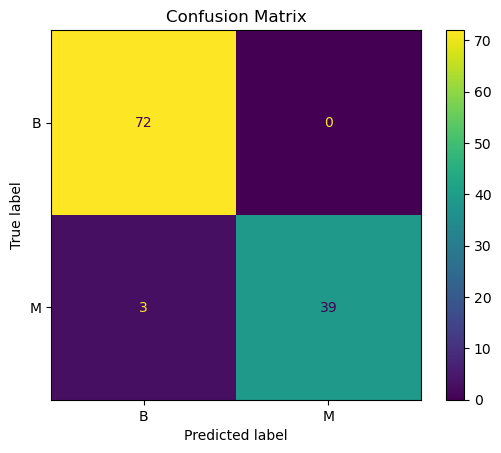

In [15]:
# Cálculo de la matriz de confusión
svc_cm = confusion_matrix(y_test, svc_y_pred, labels=svc_model.classes_)

# Crear estructura de la matriz de confusión
svc_disp = ConfusionMatrixDisplay(confusion_matrix=svc_cm,
                                  display_labels=svc_model.classes_)

# Graficar matriz de confusión
svc_disp.plot(values_format='')
plt.title("Confusion Matrix")
plt.show()

In [16]:
# Crear un reporte de clasificación del modelo de SVM
print(classification_report(y_test, svc_y_pred, target_names=target_names))

                     precision    recall  f1-score   support

   Predicted Benign       0.96      1.00      0.98        72
Predicted Maglinant       1.00      0.93      0.96        42

           accuracy                           0.97       114
          macro avg       0.98      0.96      0.97       114
       weighted avg       0.97      0.97      0.97       114



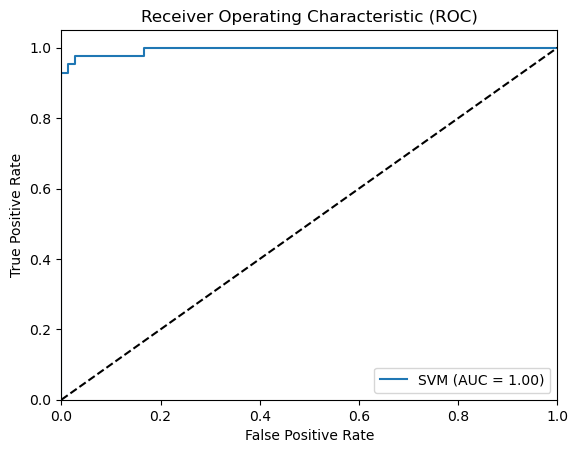

In [17]:
# Calcular curva ROC del modelo de SVM
svc_probs = svc_model.predict_proba(X_test)[:, 1]
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs, pos_label="M")
svc_auc = roc_auc_score(y_test, svc_probs)

# Graficar curva ROC
plt.plot(svc_fpr, svc_tpr, label='SVM (AUC = %0.2f)' % svc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### Random Forest

Es otro algoritmo de aprendizaje supervisado que combina multiples **árboles de desición**, cada uno entrenado por separado con diferentes datos.
Basado en lógica binaria multivariante.

*   Utiliza **bagging** que es una técnica de ensamblaje, genera múltiples conjuntos de datos de la base de datos original.
*   Para cada conjunto, se construye un árbol, con un subconjunto de **características** para cada uno.

Para cada predicción, cada árbol realiza una propia y, dependiendo del algoritmo (si es de clasificación o regresión), la predicción final se dará por votación o promedio.

<img src="https://www.freecodecamp.org/news/content/images/2020/08/how-random-forest-classifier-work.PNG" width=300, height=215>

##### Ejemplo con random forest

In [18]:
# Construir un random forest y ajustarlo de acuerdo a los datos de entrenamiento
rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)

# Utilizar el modelo para realizar predicciones para el conjunto de datos de prueba
rf_y_pred = rf_model.predict(X_test)

/home/msr/miniconda3/envs/deep_learning/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


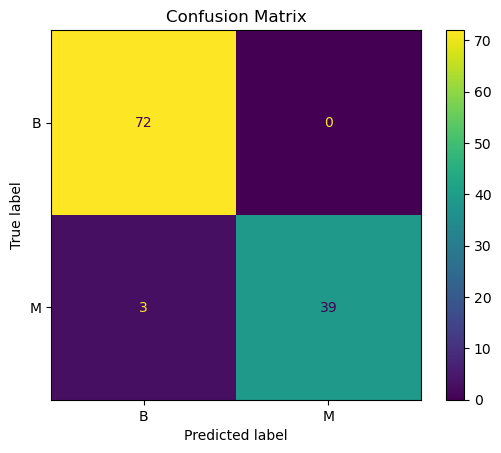

In [19]:
# Calcular matriz de confusión
rf_cm = confusion_matrix(y_test, rf_y_pred, labels=rf_model.classes_)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm,
                                  display_labels=rf_model.classes_)

# Graficar matriz de confusión
rf_disp.plot(values_format='')
plt.title("Confusion Matrix")
plt.show()

In [20]:
# Crear un reporte de clasificación del modelo de Random Forest
print(classification_report(y_test, rf_y_pred, target_names=target_names))

                     precision    recall  f1-score   support

   Predicted Benign       0.96      1.00      0.98        72
Predicted Maglinant       1.00      0.93      0.96        42

           accuracy                           0.97       114
          macro avg       0.98      0.96      0.97       114
       weighted avg       0.97      0.97      0.97       114



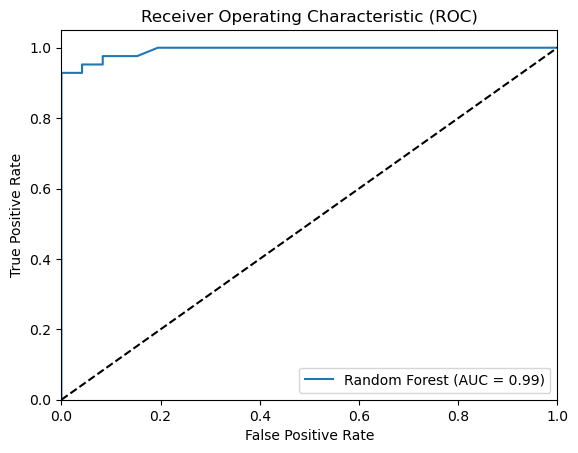

In [22]:
# Calcular curva ROC del Random Forest
rf_probs = rf_model.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs, pos_label="M")
rf_auc = roc_auc_score(y_test, rf_probs)

# Graficar curva ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## Arquitecturas de Deep Learning
---

### Pre-procesamiento de datos
En las siguientes celdas visualizaremos los datos con los que trabajaremos para la explicación y demostración de 3 arquitecturas de aprendizaje profundo.

In [2]:
# Definir el dispositivo de entrenamiento
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [3]:

# Pre-procesamiento de los datos
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = ImageFolder('../brain_tumor_MRI_dataset/Training', transform=data_transforms)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

val_dataset = ImageFolder('../brain_tumor_MRI_dataset/Testing', transform=data_transforms)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
# Cargar un batch para visualizar algunas de las muestras junto con la etiqueta asociada
data_iter = iter(train_loader)
images, labels = next(data_iter)


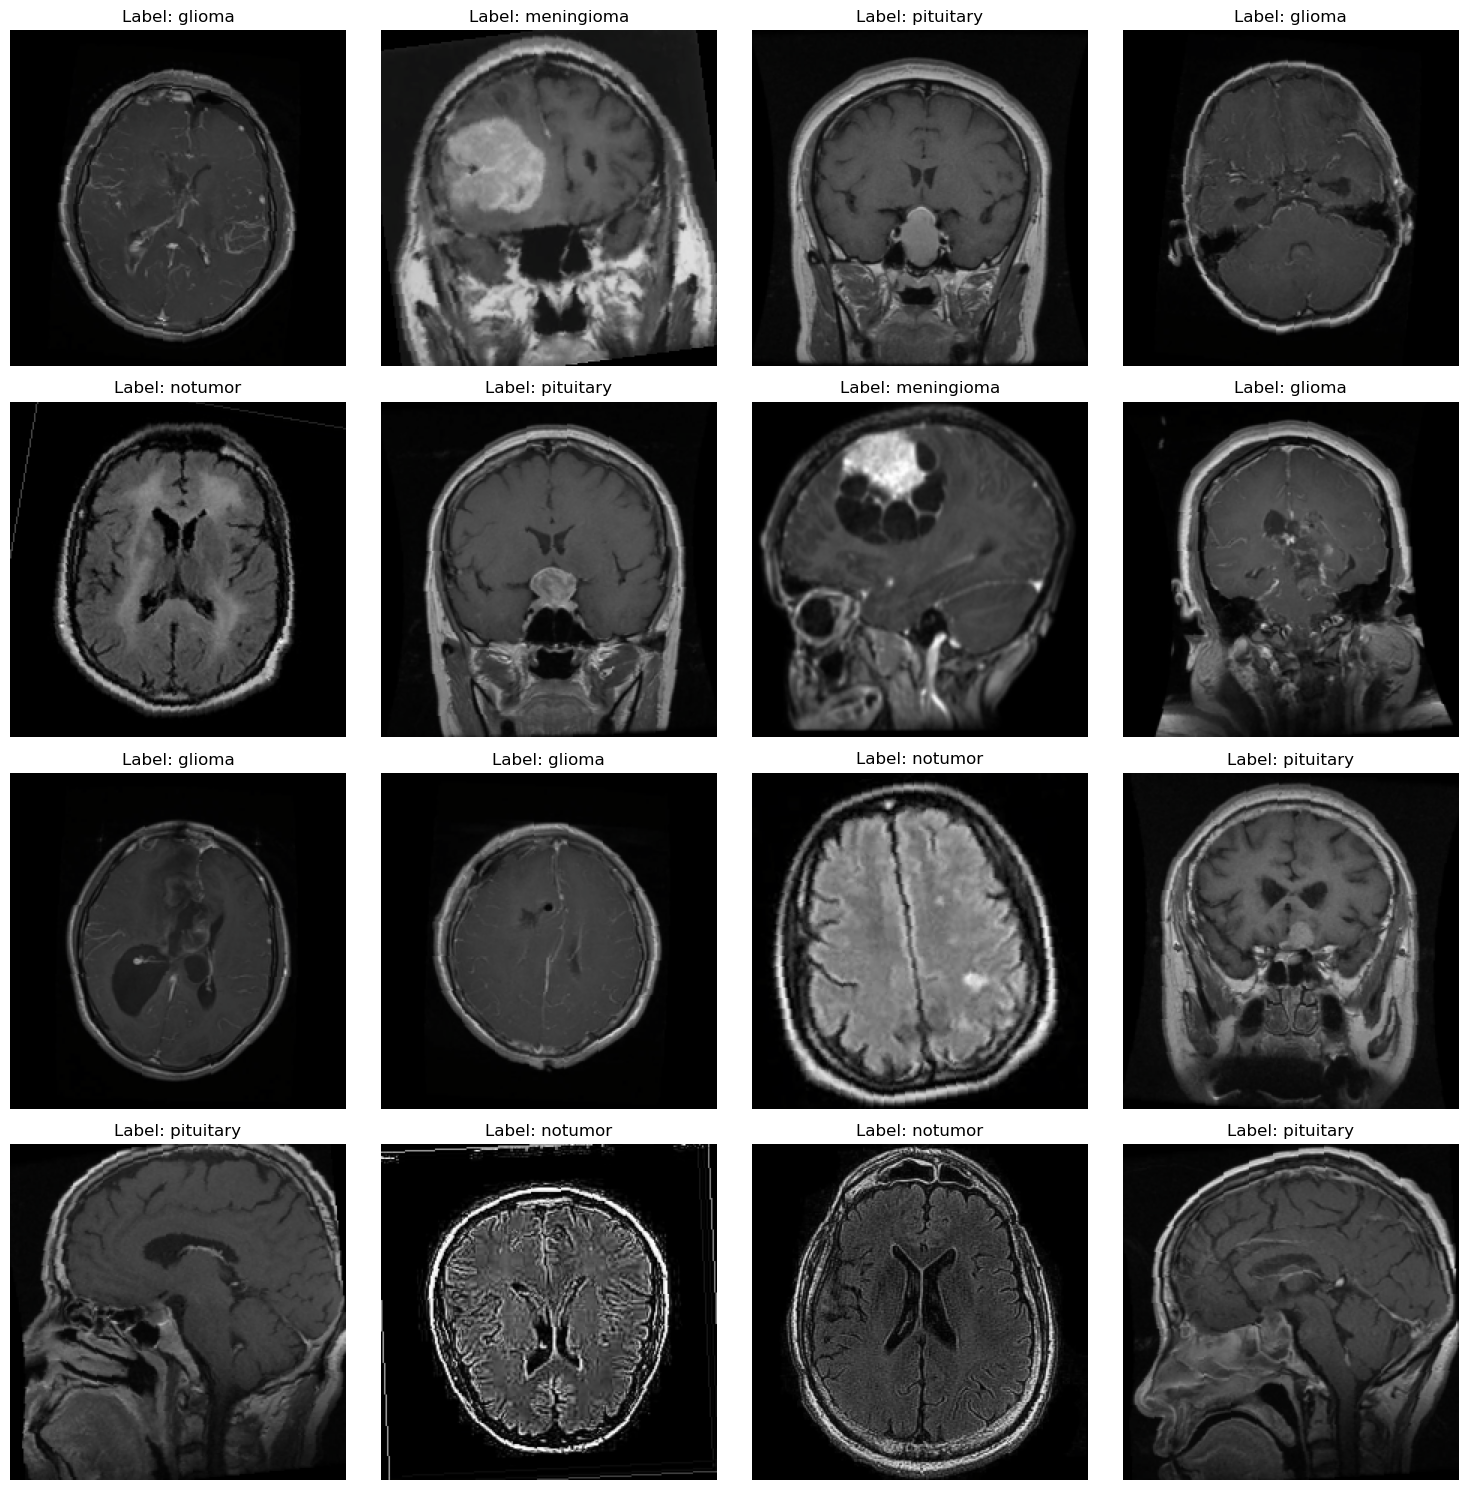

In [4]:
# Convertir imágenes a arreglos de números y normalizar
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
images = (images.numpy().transpose((0, 2, 3, 1)) * std + mean).clip(0, 1)

# Crear un grid de imágenes
num_images = len(images)
rows = int(np.ceil(num_images / 4))
fig, axes = plt.subplots(rows, 4, figsize=(15, 15))

# Graficar imágenes junto a su 
for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(images[i])
        ax.set_title(f'Label: {train_dataset.classes[labels[i]]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

### MLP (Perceptrón Multicapa)

Es la arquitectura más simple de redes neuronales artificiales. Representa de manera sencilla los 3 tipos de capas que conforman a las redes neuronales artifuciales:

* **Capa de entrada**: conformada por las neuronas que representan a los valores de entrada ($x_i$)
* **Capa(s) oculta(s)**: conformada por las neuronas $h_i^j$ que reciben la suma de los productos de la capa anterior
* **Capa de salida**: la forma la(s) neurona(s) que representa(n) la predicción por la red neuronal. Es decir la capa al final de la arquitectura

#### Representación gráfica de un MLP

<img    src="images/MLP.png"
        width="300"
        height="300" />

#### Ejemplo de aplicación de un perceptrón multicapa

### CNN

Son redes neuronales que emplean la operación conocida como **convolución** en al menos una de sus capas para procesar los datos de entrada. Son utilizadas generalmente en el campo de la **visión computacional**. Son las más usadas en el ramo de la imagenología médica debido a su gran capacidad de abstraer características complejas dentro de imágenes.

La convolución es una operación matemática que involucra el uso de un kernel (o filtro) con los datos de entrada de tal forma que en una dimensión se vería de la siguiente manera:

#### Ilustración de la operación de convolución en una dimensión
<img    src="images/Conv1.png"
        width="470"
        height="400">

#### Ejemplo de aplicación de una CNN
Ejemplo extraído de [Abdallah Waigh en Kaggle](https://www.kaggle.com/code/abdallahwagih/brain-tumor-classification-pytorch).

In [5]:
# Definición del modelo
class TumorClassifier(nn.Module):
    def __init__(self, num_classes):
        super(TumorClassifier, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(32 * 56 * 56, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

model = TumorClassifier(num_classes=4)

model.to(device)

TumorClassifier(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=100352, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=4, bias=True)
  )
)

In [6]:
# Definir función de pérdida y optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

##### Entrenamiento del modelo

In [7]:
# Inicializar listas para registrar resultados del entrenamiento
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [9]:
# Ciclo de entrenamiento
num_epochs = 20
best_val_accuracy = 0.0

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_accuracy = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    
    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    val_loss /= len(val_loader)
    val_accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.2%}, '
          f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2%}')

    
    # Save the best model
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model.state_dict(), 'best_model.pt')

Epoch [1/20], Training Loss: 238.9543, Training Accuracy: 76.87%, Validation Loss: 0.4162, Validation Accuracy: 83.14%
Epoch [2/20], Training Loss: 114.3837, Training Accuracy: 88.01%, Validation Loss: 0.3284, Validation Accuracy: 87.64%
Epoch [3/20], Training Loss: 86.4665, Training Accuracy: 90.98%, Validation Loss: 0.3370, Validation Accuracy: 88.18%
Epoch [4/20], Training Loss: 62.4558, Training Accuracy: 93.52%, Validation Loss: 0.1902, Validation Accuracy: 93.36%
Epoch [5/20], Training Loss: 48.3252, Training Accuracy: 95.31%, Validation Loss: 0.2979, Validation Accuracy: 91.30%
Epoch [6/20], Training Loss: 41.1054, Training Accuracy: 96.03%, Validation Loss: 0.1405, Validation Accuracy: 94.81%
Epoch [7/20], Training Loss: 28.9106, Training Accuracy: 97.06%, Validation Loss: 0.2334, Validation Accuracy: 92.52%
Epoch [8/20], Training Loss: 24.8543, Training Accuracy: 97.69%, Validation Loss: 0.1684, Validation Accuracy: 95.12%
Epoch [9/20], Training Loss: 23.4374, Training Accurac

##### Evaluación del modelo

In [10]:
# Cálculo de la exactitud del modelo
accuracy = correct / total
print(f'Validation Accuracy: {accuracy:.2%}')

Validation Accuracy: 97.10%


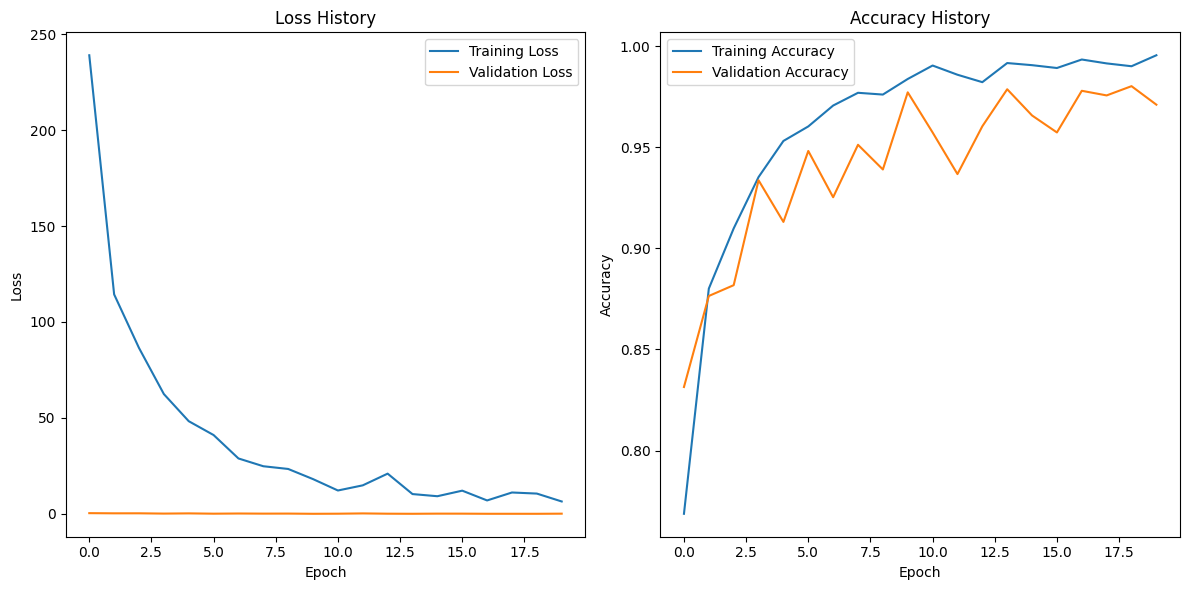

In [11]:
# Visualizar progreso del modelo durante el entrenamiento
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss History')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy History')

plt.tight_layout()
plt.show()

### RNN
**RNN** son las siglas de *Recurrent Neural Network*, que se traduce a Redes Neuronales Recurrentes. Estas emplean la **reincidencia** de los datos para generar predicciones, es decir, se utiliza la información procesada por un estado oculto anterior a manera de retroalimentación para generar predicciones nuevas.

En este caso los *estados ocultos* se encuentran en las *capas ocultas* de la red neuronal y en la literatura son comúnmente denotadas como $h^t$. También se les refiere como a una clase de **memoria**.

A continuación se muestra un diagrama que representa la arquitectura básica de las RNNs.

#### Ilustración de una RNN básica
<img    src="images/RNN_unfolded_output_to_hidden.png"
        width="500"
        height="300">

### Transformadores

Los *transformers* fueron la revolución del área de *procesamiento de lenguaje natural* en tareas de traducción y generación de texto cuando fueron introducidos por Vaswani y sus colaboradores en 2017. Se deshicieron de cualquier operación de convolución o de retroalimentación de la información en las redes neuronales, reemplazándolos por **procesos atencionales**. Estas arquitecturas *que ya prestaban atención* entre los valores de entrada y su relación con los valores de salida, sentaron las bases de las inteligencias artificiales más avanzadas, ejemplo de ello es el conocido ChatGPT.

La siguiente figura ilustra la arquitectura general de los transformadores:

<figure>
<img    src="images/Transformer.png"
        width=500
        height=700>
        <figcaption> Fig. #: Arquitectura básica de los transformadores (Vaswani, et al., 2017). 
</figure>

## Métricas de evaluación de modelos

### Exactitud (*Accuracy*)

Es la exactitud de la predicción del modelo, es una medida que nos informa sobre la correcta clasificación de todas las clasificaciónes. Su valor es en porcentajes de 0% a 100%.

<img src="https://www.researchgate.net/publication/358301651/figure/fig3/AS:1119397565480980@1643896585285/Graphical-representation-of-accuracy-results-of-machine-learning-algorithms.jpg" width=300, height=215>

### Sensibilidad

La especificidad es la verdadera tasa negativa de una prueba. En otras palabras, representa la proporción de personas sin la enfermedad, que tendrá un resultado negativo. Al igual que para la sensibilidad, los valores oscilan entre 0 y 100%.

<img src="https://www.genomenon.com/wp-content/uploads/2018/06/false-positive-blog-image-ss1-1024x512.png" width=300, height=215>

### Especificidad

Es la tasa de positividad verdadera de una prueba. Es decir, cuántos sujetos con una enfermedad son realmente identificados como portadores de la enfermedad por la prueba. Los valores oscilan entre 0 y 100%.

<img src="https://arize.com/wp-content/uploads/2022/05/classification-metrics.png" width=400, height=220>

### Precisión

Es una medida que nos dice de todos los casos previstos, cuántos son casos reales. Rango de valores posibles de 0 a 1.

$$Precisión = \frac{Verdaderos\ positivos}{Verdaderos\ Positivos + Falsos\ Positivos}$$

### *Recall*
Es una medida informativa que indica el número de *casos* identificados por el modelo con respecto del número de *casos* real. Por ejemplo, una pregunta que el *recall* responde es: "Del número total de pacientes con cáncer, ¿cuántos fueron correctamente identificados por el modelo?".

### Curva ROC (*Area under the receiver operator curve*)

Es una medida que detalla qué tan sensible y específico es el modelo. Normalmente se detalla en una gráfica en donde el eje *x* representa las predicciones erróneas, y el *y* las positivas. Una métrica mala en términos de sensitividad y especificidad se encontraría por debajo de una valor de 0.5. Análogamente, sería como tirar un volado.

<img src="https://th.bing.com/th/id/OIP.OYyQBvIJi4bu05POcA46BAHaHa?pid=ImgDet&w=474&h=474&rs=1"
width=300, height=300>

## Aprendizaje supervisado, no supervisado y reforzado

Son las dos principales clases en las que se clasifica el aprendizaje automático.

El **aprendizaje supervisado** consiste en un aprendizaje en donde el modelo aprende a mapear las entradas hacia una salida predefinida (etiquetas) con base en el ajuste continuo de sus parámetros. El **aprendizaje no supervisado** no cuenta con ningún tipo de identificador o etiqueta, sino que se encargan de encontrar estructuras o patrones inherentes a los datos de entrada.

### t-SNE

La "incrustación de vecinos estócasticos distribuidos en T es una tecnica de reduccion de dimensionalidad no lienal para "incrustar" datos de alta dimansión para su visualización en otro de baja dimensión. Pertenece a la familia de algoritmos de aprendizaje semi-supervisado.

Encuentra patrones basados en la similitud de las características con la "probabilidad condicional". Minimiza la diferencia entre estas probabilidades. Aprovecha tanto los datos etiquetados como los no etiquetados durante el entrenamiento.

### PCA

Es una técnica utilizada en análisis multivariante y aprendizaje automático para reducir la dimensionalidad de un conjunto de datos, manteniendo al mismo tiempo la mayor cantidad posible de información.

Se calcula la matriz de covarianza de los datos originales.

La covarianza es una medida de cómo varían dos variables juntas. La matriz de covarianza muestra cómo cada variable en el conjunto de datos se relaciona con todas las demás variables para después hacer un calculo de componentes principales para despues proyectarlos en un espacio de menor dimensión

Técnica útil para reducir la dimensionalidad de los datos mientras se conserva la mayor cantidad posible de información.

# Comprendiendo el proceso
---

1. Recopilación de datos.

Este paso es crucial para que la red neuronal o la alrquitectura pueda aprender con los resultados esperados. Una buena **elección** y cantidad dentro de la base de datos, disminuirá el sesgo estadistíco o el margen de error.

2. Preparación de nuestros datos.

Nos referimos a que los datos van a pasar por un proceso dónde se identifican y manejan los problemas en los datos, como valores faltantes, valores atípicos o datos inconsistentes. Algunas técnicas comunes incluyen imputación de valores faltantes, eliminación de duplicados y normalización de datos.

3. ¡Hora de elegir el modelo!

En esta parte del proceso, se va a elegir el modelo que mejor nos vaya a funcionar, en nuestro caso los clasificadores o el analisis de componentes principales serían una buena opción.

4. Entrenar al modelo.

Una vez elegido el modelo, llegamos a la etapa de entrenamiento con los datos pre-procesados. También se seleccionan los **hiperparámetros**, que son especificaciones de la estructura del modelo y proceso de entrenamiento.

5. Evaluación: ¿Es suficientemente competente?

Se realiza una serie de pruebas para evaluar si el modelo es óptimo, anteriormente se dividieron los datos en dos conjuntos (en ocasiones tres): de **entrenamiento** y de **prueba**.

6. Modelo listo para *inferencia*

Una vez concluidos los pasos anteriores alcanzado un rendimiento óptimo, el modelo esta listo para empezar a trabajar.

# Referencias
---

1. Auslander, N., Gussow, A. B., & Koonin, E. V. (2021). Incorporating machine learning into established bioinformatics frameworks. International journal of molecular sciences, 22(6), 2903.
2. Mendez, K. M., Reinke, S. N., & Broadhurst, D. I. (2019). A comparative evaluation of the generalised predictive ability of eight machine learning algorithms across ten clinical metabolomics data sets for binary classification. Metabolomics, 15, 1-15.
3. Rauschert, S., Raubenheimer, K., Melton, P. E., & Huang, R. C. (2020). Machine learning and clinical epigenetics: a review of challenges for diagnosis and classification. Clinical , 12, 1-11.
4. Angermueller, C., Pärnamaa, T., Parts, L., & Stegle, O. (2016). Deep learning for computational biology. Molecular systems biology, 12(7), 878.
